# Exploring different Contouring options in Magics

This notebook will help you discover lots of posibilities for designing shading of lines on your maps in Magics.

At ECMWF
#### From your workstation:
   
module swap (or load) Magics/new  
jupyter notebook  

load this notebook



**mcont** controls shading and lines on our maps. Here you can set things like colours, thickness, style, frequency of your lines and shading.  
List of all **mcont** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Contouring "Contouring parameters")


### Import Magics and define non Contour paramters

For start let's import Magics and define some **none contour** parameters. We will try not to change these much in the rest of the notebook.

In [1]:
import Magics.macro as magics

projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "central_europe",
    page_id_line             = "off"
)

coast = magics.mcoast()

legend = magics.mlegend(legend_display_type   = 'continuous')

# Different meteorological parameters we will plot in this notebook
temperature   = magics.mgrib(grib_input_file_name = "t850.grib")
geopotential  = magics.mgrib(grib_input_file_name = "z500.grib")
precipitation = magics.mgrib(grib_input_file_name = "total_precipitation.grib")

As with everything in Magics, default is something you can start with. 

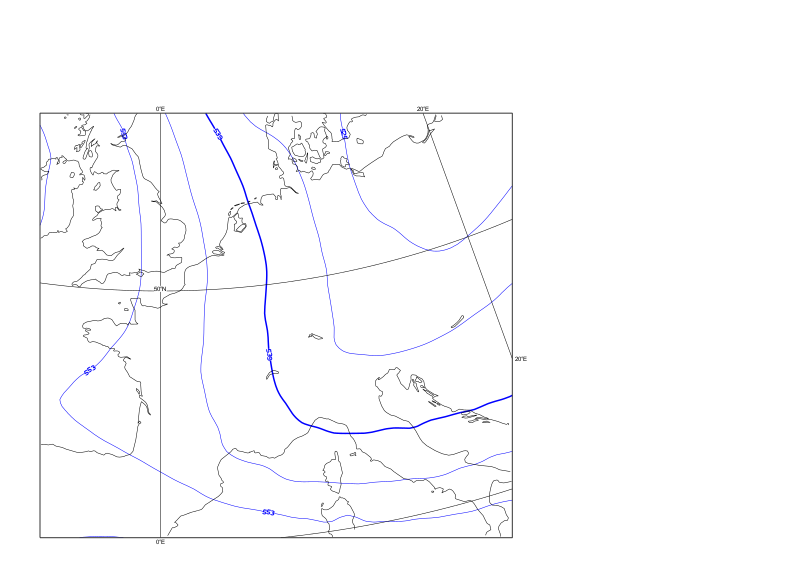

In [2]:
z_cont = magics.mcont()

magics.plot(projection, geopotential, z_cont, coast)

### Simple contouring...

Blue line for all parameters is not the most exciting or useful style for inspecting your data, so let's see what we can change here.

We will set the line and higlight line colour and thickness.

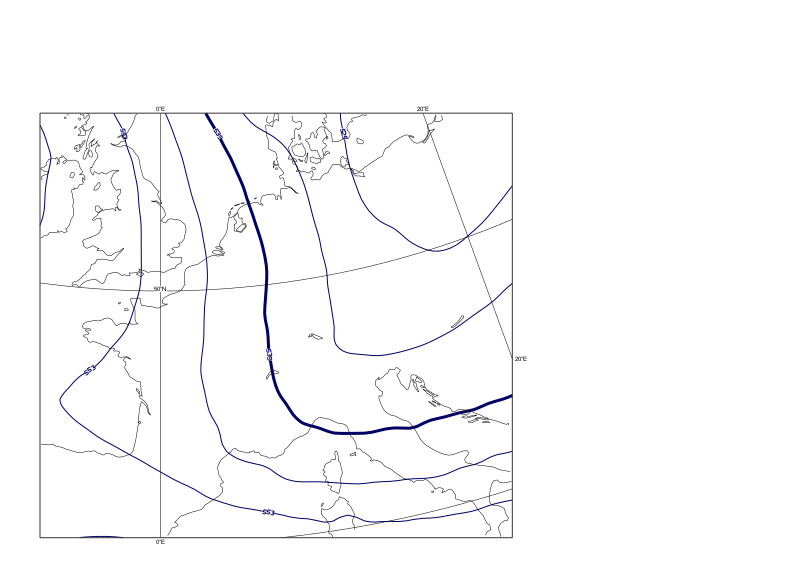

In [3]:
z_cont = magics.mcont( 
    contour_line_colour         = "navy",
    contour_line_thickness      = 2,
    contour_highlight_colour    = "navy",
    contour_highlight_thickness = 6,
    legend                      = "off"
    )

magics.plot(projection, geopotential, z_cont, coast)

### Playing with more line and label options...

Lets change line style, thickness, interval and colour. In previous example you might notice labels were a bit too tiny compared to line. We can change that too.  

By default label takes colour of line, but we can set any colour we want.

You can define levels for contours in 3 ways. In this example we use 'interval'.  

|**contour_level_selection_type** | description |
|-----------------|
|count | calculates a reasonable contour interval taking into account the min/max and the requested number of isolines |   
| interval | regularly spaced intervals using the reference_level as base |
|level_list | uses the given list of levels |

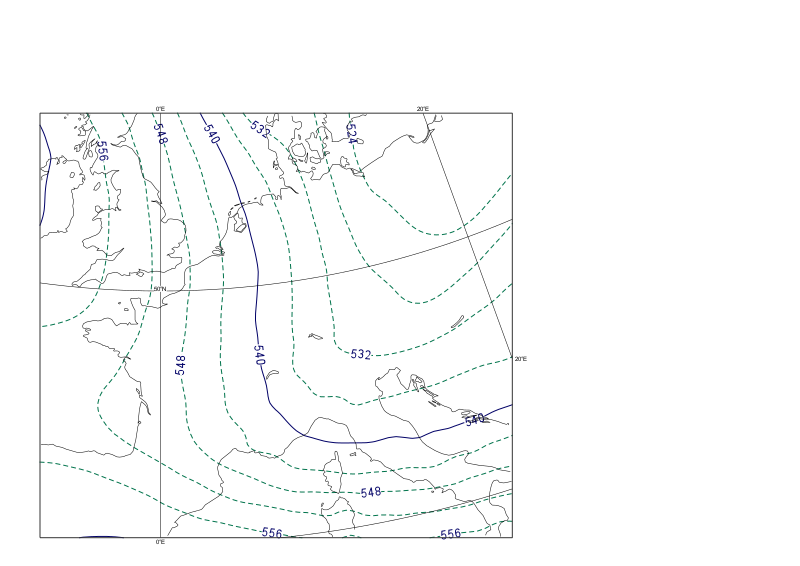

In [4]:
z_cont = magics.mcont(
    contour_level_selection_type = "interval",
    contour_reference_level      = 500,
    contour_interval             = 4.00,
    contour_line_style           = "dash",
    contour_line_colour          = "evergreen",
    contour_line_thickness       = 2,
    contour_label                = "on",
    contour_label_colour         = "navy",
    contour_label_height         = 0.50,
    contour_highlight_frequency  = 5,
    contour_highlight_colour     = "navy",
    contour_highlight_thickness  = 2,
    legend                       = "off"
)

magics.plot(projection, geopotential, z_cont, coast)

### Displaying the grid values

In this example we will see how to display grid values together with isolines. Instead of value we could also plot a marker, or both.

For the isolines, we will use **'level_list'** as a type, and then provide customized list.

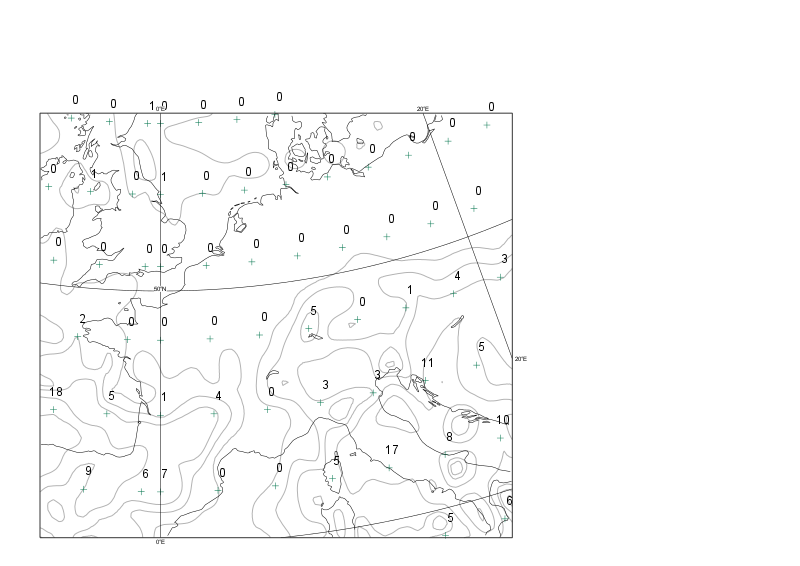

In [5]:
tp_cont = magics.mcont(
    contour_grid_value_plot          = "on",
    contour_grid_value_height        = 0.50,
    contour_grid_value_plot_type     = "both",
    contour_grid_value_format        = "(i4)",
    contour_grid_value_colour        = "black",
    contour_grid_value_marker_height = 0.5,
    contour_grid_value_marker_colour = "evergreen",
    contour_grid_value_lon_frequency = 3,
    contour_grid_value_lat_frequency = 3,
    contour_highlight                = "off",
    contour_line_colour              = "grey",
    contour_line_thickness           = 2,
    contour_level_selection_type     = "level_list",
    contour_level_list               = [0.5, 2, 4, 10, 20, 30, 50, 100, 250],
    contour_label                    = "off",
    legend                           = "off"
)

magics.plot(projection, precipitation, tp_cont, coast)

### A little digression

In the last example, some values at the top of the chart are outside of our area. Magics has a way to deal with this. 

Mmap has a parameter **subpage_clipping** which we just need to set to 'on'. This will come very useful with wind arrows plotting too.

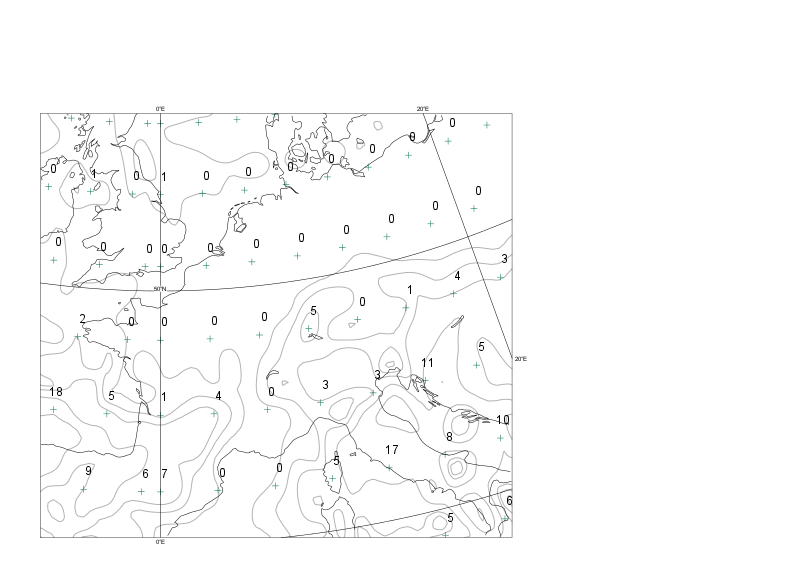

In [6]:
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "central_europe",
    subpage_clipping         = "on",
    page_id_line             = "off"
)

magics.plot(projection, precipitation, tp_cont, coast)

### Using Rainbow method to colour the isolines (computing a range of colours)

In previous examples all lines had the same colour. Using **Rainbow method** we can set that every line has different colour. Or to group them.  
Temperature is good candidate for shaded lines.

If we don't set reference level nor minimum and maximum values for lines, Magics will find minimum and maximum value of the field and put lines at our chosen interval.

These colours look nicer on dark background, so we will change coastlines a little bit.

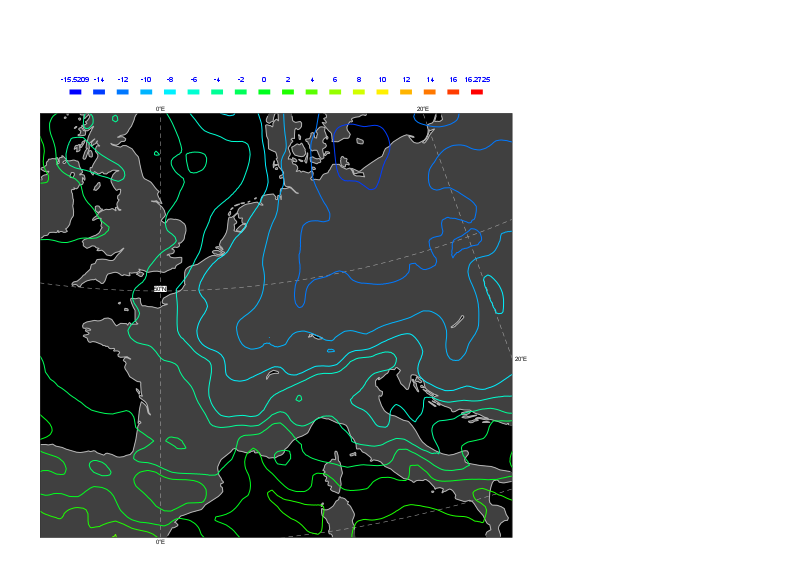

In [7]:
t_cont = magics.mcont(
    contour_label                                = "off",
    legend                                       = "on",
    contour_level_selection_type                 = "interval",
    contour_interval                             = 2.00,
    contour_highlight                            = "off",
    contour_line_thickness                       = 2,
    contour_line_colour_rainbow                  = "on",
    contour_line_colour_rainbow_method           = "calculate",
    contour_line_colour_rainbow_max_level_colour = "red",
    contour_line_colour_rainbow_min_level_colour = "blue",
    contour_line_colour_rainbow_direction        = "clockwise"
)

coast = magics.mcoast(
    map_coastline_colour            = "grey",
    map_coastline_resolution        = "medium",
    map_coastline_thickness         = 2,
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "RGB(0.25,0.25,0.25)",
    map_coastline_sea_shade         = "on",
    map_coastline_sea_shade_colour  = "black",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "grey"
)

magics.plot(projection, coast, temperature, t_cont, legend)

### Using Rainbow method to colour the isolines (list of colours and thickness)

With **Rainbow method** we can control everything. We can give it list of custom colours, thickness' and styles.  
If there is not enough elements in the list, we can tell Magics to either repeat the last one or cycle them. 

In this example, we're using  for **contour_level_selection_type = "count"**, so instead of giving Magics the interval for levels, we give number of levels we want.

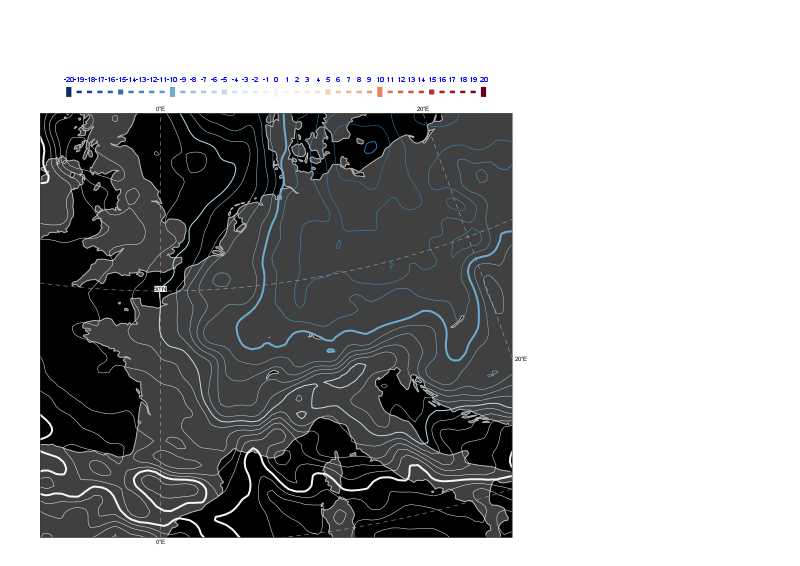

In [8]:
t_cont = magics.mcont(
    contour_label                              = "off",
    legend                                     = "on",
    contour_level_selection_type               = "count",
    contour_level_count                        = 41,
    contour_min_level                          = -20,
    contour_max_level                          = 20,
    contour_highlight                          = "off",
    contour_line_thickess                      = 2,
    contour_line_colour_rainbow                = "on",
    contour_line_colour_rainbow_method         = "list",
    contour_line_colour_rainbow_colour_list    = ['#053061', '#0c3d73', '#134a86', '#1a5899', '#2166ac', 
                                                  '#2b71b2', '#347cb8', '#3c88bd', '#4393c3', '#5a9fca', 
                                                  '#6eacd1', '#80b8d7', '#92c5de', '#a2cde3', '#b2d5e7', 
                                                  '#c2ddec', '#d1e5f0', '#dbe9f2', '#e4eef4', '#eef2f5', 
                                                  '#f7f7f7', '#f9f0eb', '#fbe9df', '#fce2d3', '#fddbc7', 
                                                  '#fccdb5', '#fac0a4', '#f7b293', '#f4a582', '#ed9474', 
                                                  '#e68367', '#de725a', '#d6604d', '#cd5144', '#c4413c', 
                                                  '#bb2f33', '#b2182b', '#9f1128', '#8c0a25', '#790422', 
                                                  '#67001f'],
    contour_line_thickness_rainbow_list        = [4,1,1,1,1,2,1,1,1,1],
    contour_line_thickness_rainbow_list_policy = "cycle"
)

magics.plot(projection, coast, temperature, t_cont, legend)

### Plotting HIGHs and LOWs

In meteorology we often want to have a clue where the center of our cyclon is, or where maximum wind gusts are.  

There is highly customizable method for this task too.  

We are using only a few hi/low contour parameters here. You can find all of them in the [**MCONT** documentation](https://confluence.ecmwf.int/display/MAGP/Contouring "Contouring parameters")

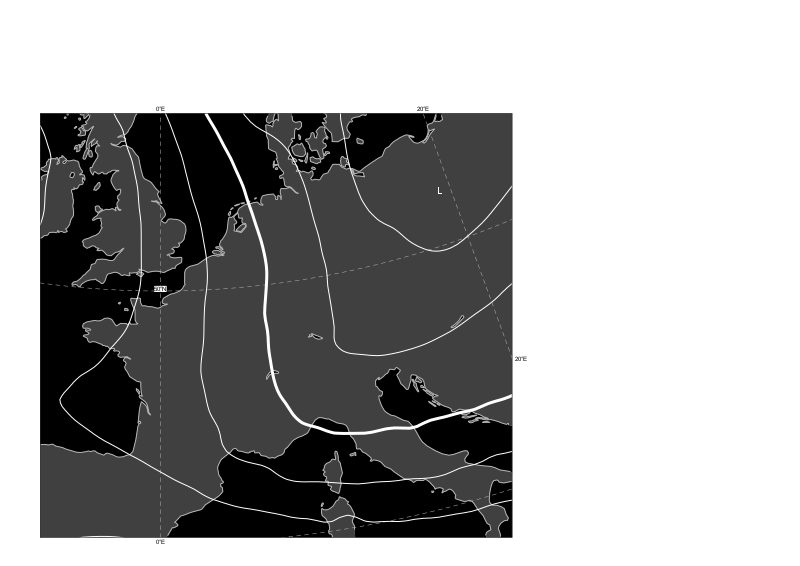

In [9]:
z_cont = magics.mcont( 
    contour_line_colour         = "white",
    contour_line_thickness      = 2,
    contour_highlight_colour    = "white",
    contour_highlight_thickness = 6,
    contour_label               = "off",
    legend                      = "off",
    contour_hilo                = "on",
    contour_hilo_height         = 0.4,
    contour_lo_colour           = "white",
    contour_hi_colour           = "white",
    contour_lo_max_value        = 560,
    contour_hi_min_value        = 540,
    )

magics.plot(projection, coast, geopotential, z_cont)